# A3Q3: `MyODE`

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
class MyODESolution():
    '''
     sol = MyODESolution()
     
     A class to store the output of a numerical ODE solver.
     
     Notes:
     - sol.t is a 1D NumPy array holding time stamps.
     - sol.y is a NumPy array with one row for every element of sol.t.
     - sol.termination is a number that indicates how the simulation ended.
           If it is -1, then the end time was reached.
           Otherwise, its value indicates which event was triggered.
    '''
    def __init__(self):
        self.t = np.array([])
        self.y = np.array([])
        self.termination = -1

## `MyODE`

In [3]:
def MyODE(f, tspan, y0, rtol=0.001, events=(lambda t,y:np.array([1]))):
    '''
     sol = MyOde(f, tspan, y0, rtol=0.001, events=[])
    
     Numerically solves the initial value problem
    
        dy(t)/dt = f(t,y)
            y(0) = y0
    
     using the Modified Euler adaptive time-stepping method.
    
     Input
       f       a Python dynamics function with calling sequence
                  dydt = f(t, y)
       tspan   2-tuple giving the start and end times, [start, end]
       y0      initial state of the system (as a 1D vector)
       rtol    the tolerance for the relative error (default 0.001)
       events  an event function with calling sequence
                  val = events(t, y)
               The function should return an array of values.
               The computation stops as soon as a negative value is
               returned by the event function.
               If no event function is given, a default event function
               is created that always returns a 1.
    
     Output
       sol is an object of class MyODESolution. It has two member variables:
       sol.t   1D vector holding time stamps
       sol.y   an array that holds one state vector per row (corresponding
               to the time stamps)
       sol.termination is a scalar that indicates how the simulation stopped
               If it is -1, then the end time was reached.
               Otherwise, its value indicates which event was triggered.
    
       Notes:
           - t and y have the same number of rows.
    
           - The first element of sol.t should be tspan[0], and the first
             row of sol.y should be the initial state, y0.
    
           - If the computation was stopped by the triggering of an event,
             then the last row of t and y should correspond to the
             time that linear interpolation indicates for the zero-crossing
             of the event-function.
    '''

    # Initial time and state
    t = tspan[0]
    y = np.array(deepcopy(y0))
    
    # Initialize output arrays, tlst and ylst
    tlst = [t]
    ylst = [list(y)]
    
    val = np.ones(len(y))  # Start out with a positive event-function value
    # You can evaluate your events function using
    #val = events(t, y)
    # Start with some step size
    h = 0.1
    

    #=== YOUR CODE HERE ===
    event_occured = 0
    event_index = 0
    while t < tspan[1]:
        val = events(t, y)
        for i in range(len(val)):
            if val[i] < 0:
                event_occured = 1
                event_index = i
                break
        if event_occured == 1:
            break
        
        t_n = t
        y_n = y
        while True:
            # Start with an Euler step
            f_1 = f(t_n, y_n)
            y_euler = y_n + h*f_1
            t = t_n + h
            # Evaluate f at the new point
            f_2 = f(t, y_euler)
            # Use the average of the two slopes
            y = y_n + 0.5*h*(f_1+f_2)
            
            # Adapting Time-Stepping
            rlocal_e = np.linalg.norm(y - y_euler) / np.linalg.norm(y)
            if rlocal_e > rtol:
                h = 0.5*h
                continue
            elif rlocal_e <= rtol:
                h = 1.2*h
                break
        
        tlst.append(t)
        ylst.append(y)
        
        #print(y)
        #print(val)
    
    # Assign values for sol.t and sol.y
    sol = MyODESolution()
    sol.t = np.array(tlst)
    sol.y = np.array(ylst)
    
    
    # If an event occurred...
    # Interpolate to get a better estimate of the event time/state
    
    
    #=== YOUR CODE HERE ===
    if event_occured == 1:
        sol.termination = event_index
    
    

    
    return sol

## Test your implementation
Try your `MyODE` function on this simple golf model.

In [4]:
# Dynamics function
def simple_golf(t, z):
    '''
        z[0] = x(t)
        z[1] = y(t)
        z[3] = y'(t)
    '''
    # Vx is defined globally
    return np.array([Vx, z[2] , -9.81])

def ground(t,z):
    return [z[1]]

In [5]:
# IVP parameters
tspan = [0, 10]
y0 = [0, 0, 15]
Vx = 25.

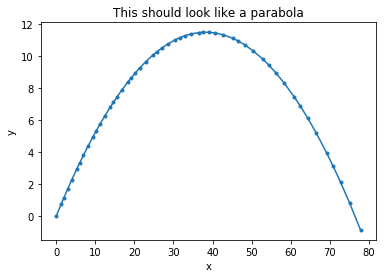

In [6]:
sol = MyODE(simple_golf, tspan, y0, events=ground)
plt.plot(sol.y[:,0], sol.y[:,1], '.-');
plt.xlabel('x'); plt.ylabel('y');
plt.title('This should look like a parabola');